In [1]:
# load some libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from scipy.special import sph_harm
from scipy.special import erf
import hf_routines as hf
import plotting as plt

In [18]:
# setup the system
N = 6        # number of electrons
nAtoms = 2   # number of atoms
M = 4        # number of basis functions

In [21]:
# set STO-3G basis 
alpha1s = [0.15432897,0.53532814,0.44463454]
alpha2s = [-0.09996723,0.39951283,0.70011547]
d1s = [16.1195750,2.9362007,0.7946505]
d2s = [0.6362897,0.1478601,0.0480887]
R = np.empty((nAtoms,3),dtype=float)
R[0,0] = R[0,1] = R[0,2] = 0.0
R[1,0] = 1.5
R[1,1] = R[1,2] = 0.0
#R[2,0] = -1.37
#R[2,1] = R[2,2] = 1E-5
R_basis = np.stack((R[0,:],R[1,:]))#R[0,:],R[1,:],R[1,:]))#,R[2,:],R[2,:]))
Z = [3.0,3.0]
basis_set = [hf.sto(3,zeta[i],R_basis[i,:]) for i in range(M)]
atoms = [hf.atom(R[i,:],Z[i]) for i in range(nAtoms)]

In [22]:
S, Sinv = hf.overlap(basis_set)

In [23]:
# compute matrices and twoE that are not dependent on coefficients
T = hf.kinetic(basis_set)
V = hf.core_potential(basis_set,atoms)
Hcore = V + T
twoE = hf.compute_twoE(basis_set)

In [14]:
X = hf.orthogonalize_basis(S)

In [27]:
X = hf.orthogonalize_basis(S)
HcoreX = np.dot(np.dot(X.T,Hcore),X)
e, C = np.linalg.eig(HcoreX)
C = np.dot(X,C)
previousE = 0.0
deltaE = 1.0
thresh = 0.0001
iteration = 0 
while deltaE > thresh and iteration < 20:
    P = hf.constructDensityMat(C,N)
    G = hf.compute_G(P,twoE)
    F = Hcore + G
    energy, C, P = hf.total_energy(F,X,Hcore,P,atoms,N)
    deltaE = abs(energy-previousE)
    previousE = energy
    iteration += 1
    print iteration, energy, deltaE

1 -1.11915679388 1.11915679388
2 -1.11915679388 0.0


In [26]:
energy_4_basis_functions = energy
print energy_4_basis_functions

-1.1193149179


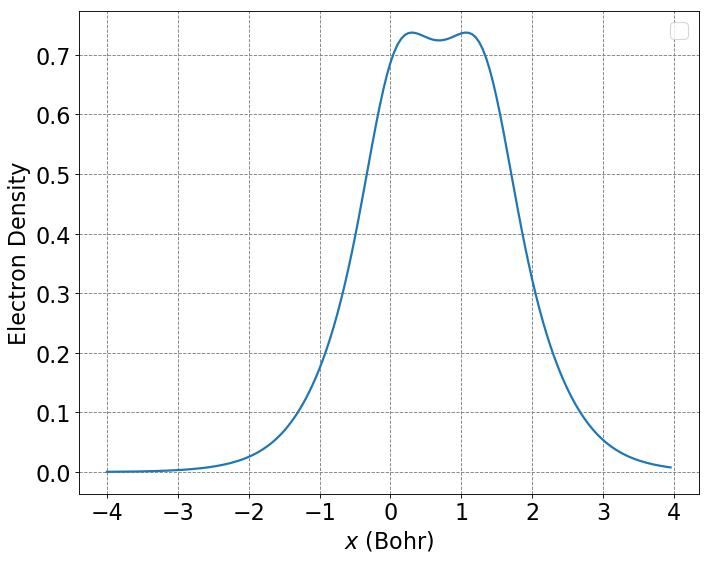

In [16]:
# plot electron density
x = np.arange(-4,4,0.05)
density1 = hf.compute_electron_density(basis_set,P,x)
#density2 = hf.compute_electron_density(basis_set,P_z_1_2,x)
ax = plt.define_figure(xlabel="$x$ (Bohr)",ylabel="Electron Density")
ax.plot(x,density1,lw=2)
#ax.plot(x,density2,lw=2,label="Z=2")
ax.legend(fontsize=20)